<a href="https://colab.research.google.com/github/O0O0O0O0OP48763/123/blob/master/DG_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy.special as sp
from numpy.polynomial.legendre import leggauss

def compute_integral(n_intervals, poly_order):
    """
    計算積分 I_{ij}^n = ∫_{I^n} φ_j(t) φ_i'(t) dt 使用 Gauss-Legendre 積分

    :param n_intervals: 區間數量 N
    :param poly_order: Legendre 多項式最高階數
    :return: I 矩陣 (n_intervals, poly_order+1, poly_order+1)
    """
    x_nodes = np.linspace(0, 2, n_intervals + 1)  # 劃分區間節點
    I_matrix = np.zeros((n_intervals, poly_order + 1, poly_order + 1))  # 儲存每個區間的積分矩陣

    # Gauss-Legendre 積分點與權重
    gauss_x, gauss_w = leggauss(poly_order + 1)  # 使用 (poly_order+1) 個積分點

    for k in range(n_intervals):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k  # 區間長度

        for i in range(poly_order + 1):
            P_i = sp.legendre(i)  # P_i(x)
            dP_i = P_i.deriv()    # P_i'(x)

            for j in range(poly_order + 1):
                P_j = sp.legendre(j)  # P_j(x)

                # 使用 Gauss-Legendre 積分
                integral = 0.0
                for q in range(len(gauss_x)):
                    xi = gauss_x[q]  # [-1,1] 上的積分點
                    t = x_k + (xi + 1) * h / 2  # 對應回 [x_k, x_kp1]
                    phi_j = P_j(xi)  # P_j(T(t))
                    phi_i_prime = (2 / h) * dP_i(xi)  # d/dt[P_i(T(t))] = (2/h) P_i'(ξ)
                    integral += gauss_w[q] * phi_j * phi_i_prime  # 加總加權積分值

                integral *= h / 2  # 調整積分區間對應的權重

                I_matrix[k, i, j] = integral  # 儲存結果

    return I_matrix

# 測試
n_intervals = 6  # 6 個子區間
poly_order = 3   # 最高階為 3 的 Legendre 多項式
I_result = compute_integral(n_intervals, poly_order)

# 顯示計算結果
print("積分矩陣 I_{ij}^n:")
for k in range(n_intervals):
    print(f"區間 {k+1}:")
    print(I_result[k])


積分矩陣 I_{ij}^n:
區間 1:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00 -3.70074342e-17 -3.33066907e-16  1.11022302e-16]
 [ 0.00000000e+00  2.00000000e+00  0.00000000e+00 -2.96059473e-16]
 [ 2.00000000e+00  0.00000000e+00  2.00000000e+00 -2.22044605e-16]]
區間 2:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00 -3.70074342e-17 -3.33066907e-16  1.11022302e-16]
 [ 0.00000000e+00  2.00000000e+00  0.00000000e+00 -2.96059473e-16]
 [ 2.00000000e+00  0.00000000e+00  2.00000000e+00 -2.22044605e-16]]
區間 3:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  3.70074342e-17 -3.33066907e-16  7.40148683e-17]
 [ 0.00000000e+00  2.00000000e+00  0.00000000e+00 -2.22044605e-16]
 [ 2.00000000e+00  0.00000000e+00  2.00000000e+00 -2.22044605e-16]]
區間 4:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  0.00000000e+00 -2.96059473e-16  5.55111512e-17]
 [ 0.00000000e+00  2

In [5]:
import numpy as np
import scipy.special as sp
from numpy.polynomial.legendre import leggauss

def compute_integral_f_phi(n_intervals, poly_order, f):
    """
    計算 I_i^n = ∫_{I^n} f(t) φ_i(t) dt 使用 Gauss-Legendre 積分

    :param n_intervals: 區間數量
    :param poly_order: Legendre 多項式最高階數
    :param f: 目標函數 f(t)
    :return: I 矩陣 (n_intervals, poly_order+1)
    """
    x_nodes = np.linspace(0, 2, n_intervals + 1)  # 劃分區間
    I_matrix = np.zeros((n_intervals, poly_order + 1))  # 存儲積分結果

    # Gauss-Legendre 積分點與權重
    gauss_x, gauss_w = leggauss(poly_order + 1)  # 使用 (poly_order+1) 個積分點

    for k in range(n_intervals):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k  # 區間長度

        # 變換回原本區間 I^n 的函數
        t_values = 0.5 * h * (gauss_x + 1) + x_k  # T^{-1}(ξ)

        for i in range(poly_order + 1):
            P_i_values = sp.legendre(i)(gauss_x)  # 計算 φ_i(ξ)
            integral = np.sum(gauss_w * f(t_values) * P_i_values) * (h / 2)  # Gauss-Legendre 積分
            I_matrix[k, i] = integral  # 儲存結果

    return I_matrix

# 測試
n_intervals = 4  # 4 個子區間
poly_order = 2   # 最高階為 2 的 Legendre 多項式
f = lambda t: np.exp(t)  # f(t) = e^t
I_result = compute_integral_f_phi(n_intervals, poly_order, f)

# 顯示計算結果
print("積分結果 I_i^n:")
for k in range(n_intervals):
    print(f"區間 {k+1}: {I_result[k]}")


積分結果 I_i^n:
區間 1: [0.64872127 0.05383607 0.00268342]
區間 2: [1.06956055 0.08876067 0.00442422]
區間 3: [1.76340723 0.14634161 0.0072943 ]
區間 4: [2.90736701 0.24127652 0.01202627]


In [6]:
import numpy as np
import scipy.special as sp
from numpy.polynomial.legendre import leggauss

def compute_dg_projection(n_intervals, poly_order, f):
    """
    計算 DG 投影的係數與重構函數 f_N^n(x)
    """
    x_nodes = np.linspace(0, 2, n_intervals + 1)
    c_kn = np.zeros((n_intervals, poly_order + 1))

    # Gauss-Legendre 積分點與權重
    gauss_x, gauss_w = leggauss(poly_order + 1)

    for k in range(n_intervals):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k

        t_values = 0.5 * h * (gauss_x + 1) + x_k  # 對應區間上的 x 值

        for i in range(poly_order + 1):
            P_i_values = sp.legendre(i)(gauss_x)  # 計算 φ_i(ξ)
            integral = np.sum(gauss_w * f(t_values) * P_i_values) * (h / 2)
            c_kn[k, i] = integral  # 係數計算

    return x_nodes, c_kn

def reconstruct_f_projection(x, k, x_nodes, c_kn, poly_order):
    """ 使用 DG 係數重建 f_N^n(x) """
    x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
    h = x_kp1 - x_k
    xi = 2 * (x - x_k) / h - 1  # 轉換到標準 [-1,1]
    return sum(c_kn[k, i] * sp.legendre(i)(xi) for i in range(poly_order + 1))

def compute_L2_error(n_intervals, poly_order, f, x_nodes, c_kn):
    """ 計算 L^2 誤差 """
    error_sq = 0.0
    gauss_x, gauss_w = leggauss(poly_order + 1)

    for k in range(n_intervals):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k
        t_values = 0.5 * h * (gauss_x + 1) + x_k

        f_exact = f(t_values)
        f_proj = np.array([reconstruct_f_projection(t, k, x_nodes, c_kn, poly_order) for t in t_values])

        error_sq += np.sum(gauss_w * (f_exact - f_proj) ** 2) * (h / 2)

    return np.sqrt(error_sq)

# 參數設定
n_intervals = 4
poly_order = 2
f = lambda x: np.exp(x)

# 計算投影函數
x_nodes, c_kn = compute_dg_projection(n_intervals, poly_order, f)

# 計算 L2 誤差
L2_error = compute_L2_error(n_intervals, poly_order, f, x_nodes, c_kn)
print(f"L^2 誤差: {L2_error:.6f}")


L^2 誤差: 2.634788


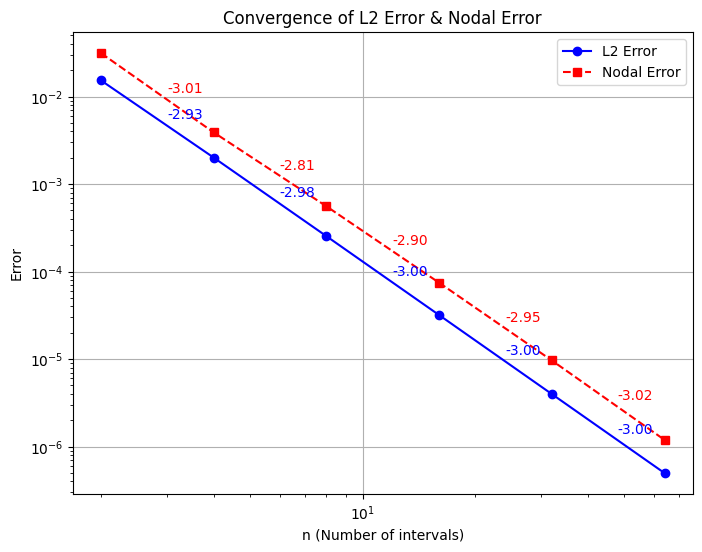

In [10]:
import numpy as np
import scipy.special as sp
import scipy.integrate as spi
import matplotlib.pyplot as plt

def f(x):
    """原函數 e^x"""
    return np.exp(x)

def compute_dg_coefficients(n, N):
    """計算 DG 投影的係數 c_kn"""
    x_nodes = np.linspace(0, 2, n + 1)
    c_kn = np.zeros((n, N + 1))

    for k in range(n):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k

        for m in range(N + 1):
            Pm = lambda x: sp.legendre(m)(2 * (x - x_k) / h - 1)
            integral, _ = spi.quad(lambda x: f(x) * Pm(x), x_k, x_kp1)
            c_kn[k, m] = (2 * m + 1) / h * integral

    return x_nodes, c_kn

def f_proj(x, k, c_kn, x_k, x_kp1, N):
    """在區間 [x_k, x_kp1] 上計算投影函數"""
    h = x_kp1 - x_k
    xi = 2 * (x - x_k) / h - 1
    return sum(c_kn[k, m] * sp.legendre(m)(xi) for m in range(N + 1))

def compute_L2_error(f, f_proj, c_kn, x_nodes, N):
    """計算 L2 誤差"""
    error_sq = 0.0

    for k in range(len(x_nodes) - 1):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        error_func = lambda x: (f(x) - f_proj(x, k, c_kn, x_k, x_kp1, N))**2
        integral, _ = spi.quad(error_func, x_k, x_kp1)
        error_sq += integral

    return np.sqrt(error_sq)

def compute_nodal_error(f, f_proj, x_nodes, c_kn, N):
    """計算 nodal error"""
    x_test = np.linspace(0, 2, 100)
    errors = [abs(f(x) - f_proj(x, k, c_kn, x_nodes[k], x_nodes[k+1], N))
              for x in x_test for k in range(len(x_nodes)-1) if x_nodes[k] <= x < x_nodes[k+1]]
    return max(errors)

def compute_convergence_rate(errors, n_values):
    """計算收斂率"""
    rates = []
    for i in range(len(n_values) - 1):
        rate = (np.log(errors[i+1]) - np.log(errors[i])) / (np.log(n_values[i+1]) - np.log(n_values[i]))
        rates.append(rate)
    return rates

# 設定不同的 n 值
N = 2
n_values = [2, 4, 8, 16, 32, 64]
L2_errors = []
nodal_errors = []

for n in n_values:
    x_nodes, c_kn = compute_dg_coefficients(n, N)
    L2_error = compute_L2_error(f, f_proj, c_kn, x_nodes, N)
    nodal_error = compute_nodal_error(f, f_proj, x_nodes, c_kn, N)
    L2_errors.append(L2_error)
    nodal_errors.append(nodal_error)

# 計算收斂率
L2_rates = compute_convergence_rate(L2_errors, n_values)
nodal_rates = compute_convergence_rate(nodal_errors, n_values)

# 繪製誤差與收斂率
plt.figure(figsize=(8,6))
plt.loglog(n_values, L2_errors, marker='o', linestyle='-', color='b', label='L2 Error')
plt.loglog(n_values, nodal_errors, marker='s', linestyle='--', color='r', label='Nodal Error')

# 標示收斂率
for i in range(len(L2_rates)):
    x_pos = (n_values[i] + n_values[i+1]) / 2
    y_pos_L2 = np.sqrt(L2_errors[i] * L2_errors[i+1])
    y_pos_nodal = np.sqrt(nodal_errors[i] * nodal_errors[i+1])
    plt.text(x_pos, y_pos_L2, f"{L2_rates[i]:.2f}", fontsize=10, color='b')
    plt.text(x_pos, y_pos_nodal, f"{nodal_rates[i]:.2f}", fontsize=10, color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("n (Number of intervals)")
plt.ylabel("Error")
plt.title("Convergence of L2 Error & Nodal Error")
plt.legend()
plt.grid()
plt.show()



In [11]:
print(L2_errors)
print(L2_rates)

[0.015281135603546969, 0.002004420074599656, 0.0002537016012491628, 3.1812821663561354e-05, 3.979745153050527e-06, 4.975664526855613e-07]
[-2.930494963018143, -2.981980361604306, -2.995452381414585, -2.998860384114745, -2.999714925964179]


In [12]:
print(nodal_errors)
print(nodal_rates)

[0.03131992751917689, 0.0038903250978288284, 0.0005566044842701956, 7.448582246283308e-05, 9.635287310238994e-06, 1.1911270174636002e-06]
[-3.0091182487209522, -2.80516628323727, -2.901614775683372, -2.9505662596164344, -3.016000421057822]
